In [10]:
# Name: Mamunur Rashid
# Reg. No.: 2017132014


import matplotlib.pyplot as plt
import numpy as np

def polyFit(x, y):
    
    """
    I am going to fit the data on to a 2 degree polynomial(parabola fit) because the data seems lean toward a parabola. 
    Minimization of squared distance leads to the following system of equations.

    a sum(Xi^4) + b sum(Xi^3) + c sum(Xi^2) = sum(Xi^2 Yi)
    a sum(Xi^3) + b sum(Xi^2) + c sum(Xi)   = sum(Xi Yi)
    a sum(Xi^2) + b sum(Xi)   + c n         = sum(Xi)

    Where sum run from 0 to n(number of data points)
    
    So, by solving this system, we will have coefficients of our polynomial fit.

    """

    # defining variables for summation terms

    Xi4 = 0
    Xi3 = 0
    Xi2 = 0
    Xi = 0
    Xi2Yi = 0
    XiYi = 0
    Yi = 0

    # running a loop to calculate all summation terms

    for xi, yi in zip(x,y):
        Xi4 += xi**4
        Xi3 += xi**3
        Xi2 += xi**2
        Xi += xi
        Xi2Yi += yi*xi**2
        XiYi += xi*yi
        Yi += yi
    
    # I will solve the system with the method called "Cramer's rule"
    # first I define coefficient matrix in which successive columns contain coefficients of a, b and c respectively

    coefficient_matrix = np.array([[Xi4, Xi3, Xi2], [Xi3, Xi2, Xi], [Xi2, Xi, len(x)]])
    
    # defining constant matrix which contains constants of the system
    constant_matrix = np.array([Xi2Yi, XiYi, Yi])

    # D sub x matrix is found by replacing first colum of coefficient matrix with constant matrix
    
    ## NOTE: I am replacing row here, so I have to transpose the matrix before calculating determinant. 
    ## However, I do not actually need to do that because transposing a matrix does not change its determinant.

    D_sub_a_matrix = np.copy(coefficient_matrix)
    D_sub_a_matrix[0] = constant_matrix
    
    # Similarly, D sub y and D sub z  matrix is found by replacing second and third colum of coefficient matrix with constant matrix respectively
    
    D_sub_b_matrix = np.copy(coefficient_matrix)
    D_sub_b_matrix[1] = constant_matrix

    D_sub_c_matrix = np.copy(coefficient_matrix)
    D_sub_c_matrix[2] = constant_matrix

    # Calculating determinants of these matrices

    D = np.linalg.det(coefficient_matrix)
    D_sub_a = np.linalg.det(D_sub_a_matrix)
    D_sub_b = np.linalg.det(D_sub_b_matrix)
    D_sub_c = np.linalg.det(D_sub_c_matrix)
    
    # Finally, solution to the system is x = D sub x / D and so on..

    a = D_sub_a / D
    b = D_sub_b / D
    c = D_sub_c / D
    
    ## NOTE 2: I could borrow the whole process from numpy.linalg.solve(cooefficient_matrix, constant_matrix)

    return [    Xi4,
    Xi3,
    Xi2,
    Xi ,
    Xi2Yi ,
    XiYi ,
    Yi ,]

# Given data points.

x = [1, 4, 7, 11, 15, 20, 30, 50, 77, 92, 100]
y = [5,    20,    52,   121,   228,   403,   903,  2504,  5929,  8464, 10005]

# coefficients of best fitted polynomial

polyFit(x, y)


[214080261, 2400335, 28605, 407, 214145051, 2401271, 28634]

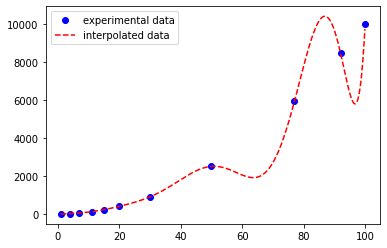

In [90]:
import matplotlib.pyplot as plt
import numpy as np

def lagrangeInterpolate(x, xi, fi):
    result = 0
    for i in range(len(xi)):
        g = fi[i]
        for j in range(len(xi)):
            if i == j:
                continue
            g *= (x - xi[j])/(xi[i] - xi[j])
        result += g
    return result
    
x =[1, 4, 7, 11, 15, 20, 30, 50, 77, 92, 100]
f = [5,    20,    52,   121,   228,   403,   903,  2504,  5929,  8464, 10005]
plt.plot(x, f, 'bo', label='experimental data')
xAxis = np.arange(x[0]+0.01,x[-1],0.1)
plt.plot(xAxis, lagrangeInterpolate(xAxis, x, f), 'r--', label='interpolated data')

plt.legend()
plt.show()



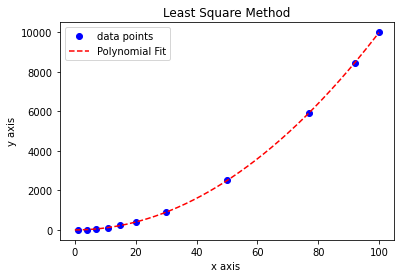

In [87]:
x= [1, 4, 7, 11, 15, 20, 30, 50, 77, 92, 100]
y= [5,    20,    52,   121,   228,   403,   903,  2504,  5929,  8464, 10005]

coefficients = polyFit(x, y, 1)

# Interpolating more data point to show as a continuous curve

xfit = np.arange(0,100,0.1)
yfit = np.zeros((len(xfit)))

for i in range(len(yfit)):
    for j, c in enumerate(np.flip(coefficients)):
        yfit[i] += c*xfit[i]

# Ploting data

plt.plot(x, y, 'bo', label='data points')
plt.plot(xfit, yfit, 'r--', label='Polynomial Fit')
plt.xlabel("x axis ")
plt.ylabel("y axis")
plt.title("Least Square Method")
plt.legend()
plt.show()

TypeError: 'function' object is not iterable

In [ ]:
    
    # I will solve the system with the method called "Cramer's rule"
    # first I define coefficient matrix in which successive columns contain coefficients of a, b and c respectively

    coefficient_matrix = np.array([[Xi4, Xi3, Xi2], [Xi3, Xi2, Xi], [Xi2, Xi, len(x)]])
    
    # defining constant matrix which contains constants of the system
    constant_matrix = np.array([Xi2Yi, XiYi, Yi])

    # D sub x matrix is found by replacing first colum of coefficient matrix with constant matrix
    
    ## NOTE: I am replacing row here, so I have to transpose the matrix before calculating determinant. 
    ## However, I do not actually need to do that because transposing a matrix does not change its determinant.

    D_sub_a_matrix = np.copy(coefficient_matrix)
    D_sub_a_matrix[0] = constant_matrix
    
    # Similarly, D sub y and D sub z  matrix is found by replacing second and third colum of coefficient matrix with constant matrix respectively
    
    D_sub_b_matrix = np.copy(coefficient_matrix)
    D_sub_b_matrix[1] = constant_matrix

    D_sub_c_matrix = np.copy(coefficient_matrix)
    D_sub_c_matrix[2] = constant_matrix

    # Calculating determinants of these matrices

    D = np.linalg.det(coefficient_matrix)
    D_sub_a = np.linalg.det(D_sub_a_matrix)
    D_sub_b = np.linalg.det(D_sub_b_matrix)
    D_sub_c = np.linalg.det(D_sub_c_matrix)
    
    # Finally, solution to the system is x = D sub x / D and so on..

    a = D_sub_a / D
    b = D_sub_b / D
    c = D_sub_c / D
    
    ## NOTE 2: I could borrow the whole process from numpy.linalg.solve(cooefficient_matrix, constant_matrix)

    return [a, b, c]

# Given data points.

x = [1, 4, 7, 11, 15, 20, 30, 50, 77, 92, 100]
y = [5,    20,    52,   121,   228,   403,   903,  2504,  5929,  8464, 10005]

# coefficients of best fitted polynomial

coefficients = polyFit(x, y)

# Interpolating more data point to show as a continuous curve

xfit = np.arange(0,100,0.1)
yfit = [((coefficients[0]*i**2) + (coefficients[1]*i) + coefficients[2]) for i in xfit]

# Ploting data

plt.plot(x, y, 'bo', label='data points')
plt.plot(xfit, yfit, 'r--', label='Polynomial Fit')
plt.xlabel("x axis ")
plt.ylabel("y axis")
plt.title("Least Square Method")
plt.legend()
plt.show()


In [22]:
import matplotlib.pyplot as plt
import numpy as np
x= [1, 4, 7, 11, 15, 20, 30, 50, 77, 92, 100]
y= [5,    20,    52,   121,   228,   403,   903,  2504,  5929,  8464, 10005]

# = [0,1,2,3,4]
#= [1, 1.8,1.3, 2.5,6.3]

Xi4 = 0
Xi3 = 0
Xi2 = 0
Xi = 0
Xi2Yi = 0
XiYi = 0
Yi = 0
for xi, yi in zip(x,y):
    Xi4 += xi**4
    Xi3 += xi**3
    Xi2 += xi**2
    Xi += xi
    Xi2Yi += yi*xi**2
    XiYi += xi*yi
    Yi += yi

print(Xi4 ,
Xi3,
Xi2 ,
Xi ,
Xi2Yi ,
XiYi ,
Yi )
    



214080261 2400335 28605 407 214145051 2401271 28634


In [29]:
delta = np.array([[Xi4, Xi3, Xi2], [Xi3, Xi2, Xi], [Xi2, Xi, len(x)]])
    #deltaA = np.copy(delta)
const = np.array([Xi2Yi, XiYi, Yi])
print(const, delta)

[214145051   2401271     28634] [[214080261   2400335     28605]
 [  2400335     28605       407]
 [    28605       407        11]]


In [30]:
res = np.linalg.solve(delta, const)

xfit = np.arange(0,10,0.1)
yfit = [(res[0]*i**2) + (res[1]*i)+ res[2] for i in xfit]

In [31]:
    #deltaA[0] = const
    #deltaB = np.copy(delta)
    #deltaB[1] = const
    #deltaC = np.copy(delta)
    #deltaC[2] = const

    #Avalue = np.linalg.det(deltaA.T)/np.linalg.det(delta)
    #Bvalue = np.linalg.det(deltaB.T)/np.linalg.det(delta)
    #Cvalue = np.linalg.det(deltaC.T)/np.linalg.det(delta)
    
poly = np.linalg.solve(delta, const)

poly


#print(polyFit(x, y))




array([ 1.00043671, -0.05337715,  3.47566615])

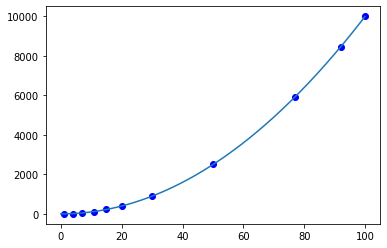

In [32]:
xfit = np.arange(0,100,0.1)
yfit = [((poly[0]*i**2) + (poly[1]*i) + poly[2]) for i in xfit]
#print(yfit)

plt.plot(x, y, 'bo')
plt.plot(xfit, yfit)
plt.show()